(1000,)


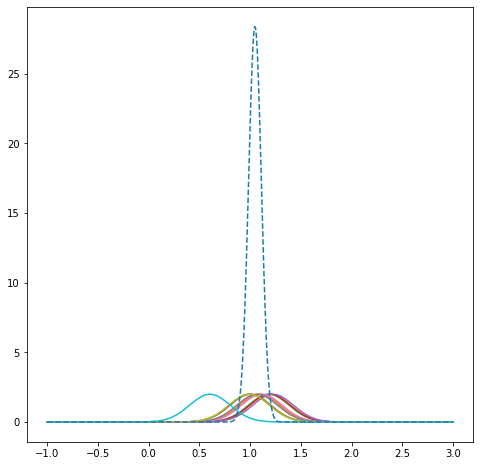

In [3]:
import numpy as np
from scipy import stats
import pylab as plt

N = 10
mu = 1
sigma = 0.2
fake = stats.norm.rvs(loc = mu, scale = sigma, size = N)

x_axis = np.linspace(-1, 3, 1000)
#stats.norm.pdf(x_axis, loc = x, scale = sigma)

likelihoods_fake = np.array([stats.norm.pdf(x_axis, loc = x, scale = sigma) for x in fake])

#print(np.size(likelihoods_fake, axis = 0))
plt.figure(figsize = (8, 8)) 
for x in range(np.size(likelihoods_fake, axis = 0)):
    plt.plot(x_axis, likelihoods_fake[x])
    
   
#A = np.array([(1, 2), (3, 4), (5, 6)])
#print(A)
#print(np.prod(A, axis = 0), np.prod(A, axis = 1))
likelihood = np.prod(likelihoods_fake, axis = 0)
print(likelihood.shape)
plt.plot(x_axis, likelihood, linestyle = '--')

In [4]:
estimate_mu = np.mean(fake)
print(estimate_mu)
ll_estimated_mu = x_axis[np.argsort(likelihood)[-1]]
print(ll_estimated_mu)
#11071-17000

1.047505728182633
1.0460460460460461


In [7]:
def fish_matrix_error(X):
    second_order_diff = np.diff(np.log(X), n = 2)
    second_order_diff /= (estimate_mu -ll_estimated_mu)**2
    second_order_diff *= -1
    second_order_diff = second_order_diff**(0.5)
    return second_order_diff
    
print(fish_matrix_error(likelihood))

#fisher_error = 
print(sigma/N**0.5)

[43.37167694 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694
 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694
 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694
 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694
 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694
 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694
 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694
 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694
 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694
 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694
 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694
 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694
 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694 43.37167694
 43.37167694 43.37167694 43.37167694 43.37167694 43

In [ ]:
np.diff?